In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
def initialize_s(qc, qubits):
    """Apply Hadamard gates to all qubits"""
    for q in qubits:
        qc.h(q)
    return qc


In [3]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    # Apply H gates to all qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    
    # Apply X gates to all qubits
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply multi-controlled Z gate
    qc.h(nqubits-1)
    qc.ccx(0, 1, nqubits-1)  # Use CCX (Toffoli) gate for 3 qubits
    for qubit in range(2, nqubits-1):
        qc.cx(qubit, nqubits-1)
    qc.ccx(0, 1, nqubits-1)
    qc.h(nqubits-1)
    
    # Apply X gates to all qubits
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply H gates to all qubits
    for qubit in range(nqubits):
        qc.h(qubit)
    
    return qc

**Diffusion (Grover's Operator):**

- Performs "reflection about the mean".

- Amplifies marked state's amplitude, reduces others.

- Mathematically: 2|ψ⟩⟨ψ| - I

- Increases marked state's amplitude, decreases others.

In [13]:
def grover_algorithm(oracle, n):
    # Initialize quantum and classical registers
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # Initialize superposition
    initialize_s(qc, qr)

    # Number of iterations
    iterations = int(np.pi/4 * np.sqrt(2**n))
    iterations = 10
    print(iterations)
    # Grover iteration
    for _ in range(iterations):
        qc.append(oracle, qr)
        qc.append(diffuser(n), qr)

    # Measure
    qc.measure(qr, cr)

    #display(qc.draw(output='mpl'))

    return qc
    

**Iteration and Amplification:**

- Repeat steps 2 and 3 approximately √N times.

- Each iteration increases sought state's amplitude.

- "Concentrates" probability on desired state.

In [14]:
# Example usage (you'll need to define your own oracle)
def example_oracle():
    qc = QuantumCircuit(3)
    qc.h(2)  # Flip the middle qubit
    qc.ccz(0, 1, 2)  # Apply CCZ to mark |101⟩
    qc.h(2)  # Flip back the middle qubit
    return qc

**Oracle Application**

- Oracle recognizes the sought state and inverts its phase.

- Inverts the phase of the sought state we are looking for

- If |ω⟩ is the sought state: |ω⟩ → -|ω⟩

- Other states remain unchanged.

- Example searching for |10⟩: |ψ⟩ = (1/2)(|00⟩ + |01⟩ - |10⟩ + |11⟩)

10
Counts: {'101': 63, '010': 64, '000': 75, '100': 62, '001': 62, '111': 56, '011': 58, '110': 60}


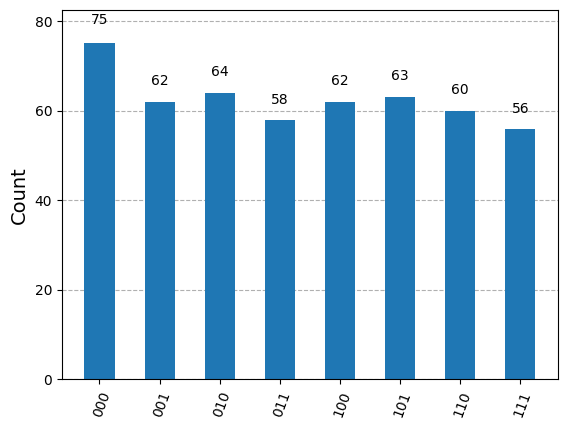

In [17]:
# Create and run the circuit
oracle = example_oracle()
n = 3  # number of qubits
grover_circuit = grover_algorithm(oracle, n)

# Transpile and run
simulator = AerSimulator()

transpiled_qc = transpile(grover_circuit, simulator)
job = simulator.run(transpiled_qc, shots=500)

result = job.result()
counts = result.get_counts()

print("Counts:", counts)

plot_histogram(counts)